<h1>
<font color="#ff2e2e">
Panorama with OpenCV
</font>
</h1>

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import os

<h3><font color = "#079e05"> This is for plotting </font></h3>

In [5]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Read input images from 1 to 8 and show them in a row together </font></h3>

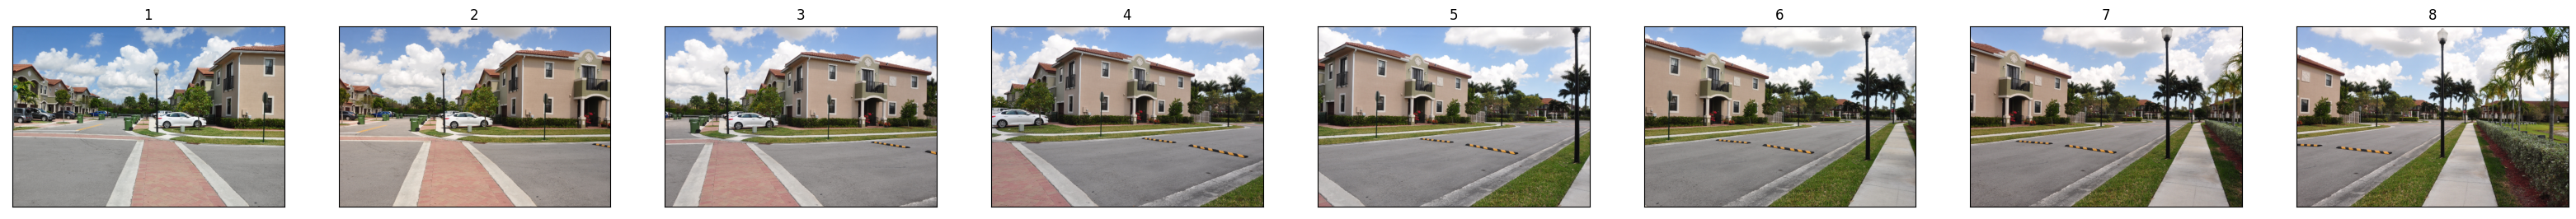

In [12]:
image_paths=['images/Q2/1.jpg','images/Q2/2.jpg','images/Q2/3.jpg','images/Q2/4.jpg',
             'images/Q2/5.jpg','images/Q2/6.jpg','images/Q2/7.jpg','images/Q2/8.jpg']
image_names=['1','2','3','4','5','6','7','8']
image_list = []
  
for i in range(len(image_paths)):
    image = cv2.imread(image_paths[i])
    image=cv2.resize(image,(0,0),fx=0.4,fy=0.4) # scale down size
    image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB),image_names[i],'img'])

plotter(image_list,1,8,False,40,20,'Q2_1')

<h3><font color = "#079e05"> Initialize OpenCV's image sticher object and then perform the image stitching on input images </font></h3>

In [20]:
# put only images in an array
images = [item[0] for item in image_list]

# work with Stitcher object
stitcher_instance=cv2.Stitcher.create()
(success_flag,result)=stitcher_instance.stitch(images)
    

<h3><font color = "#079e05"> Show the result </font></h3>

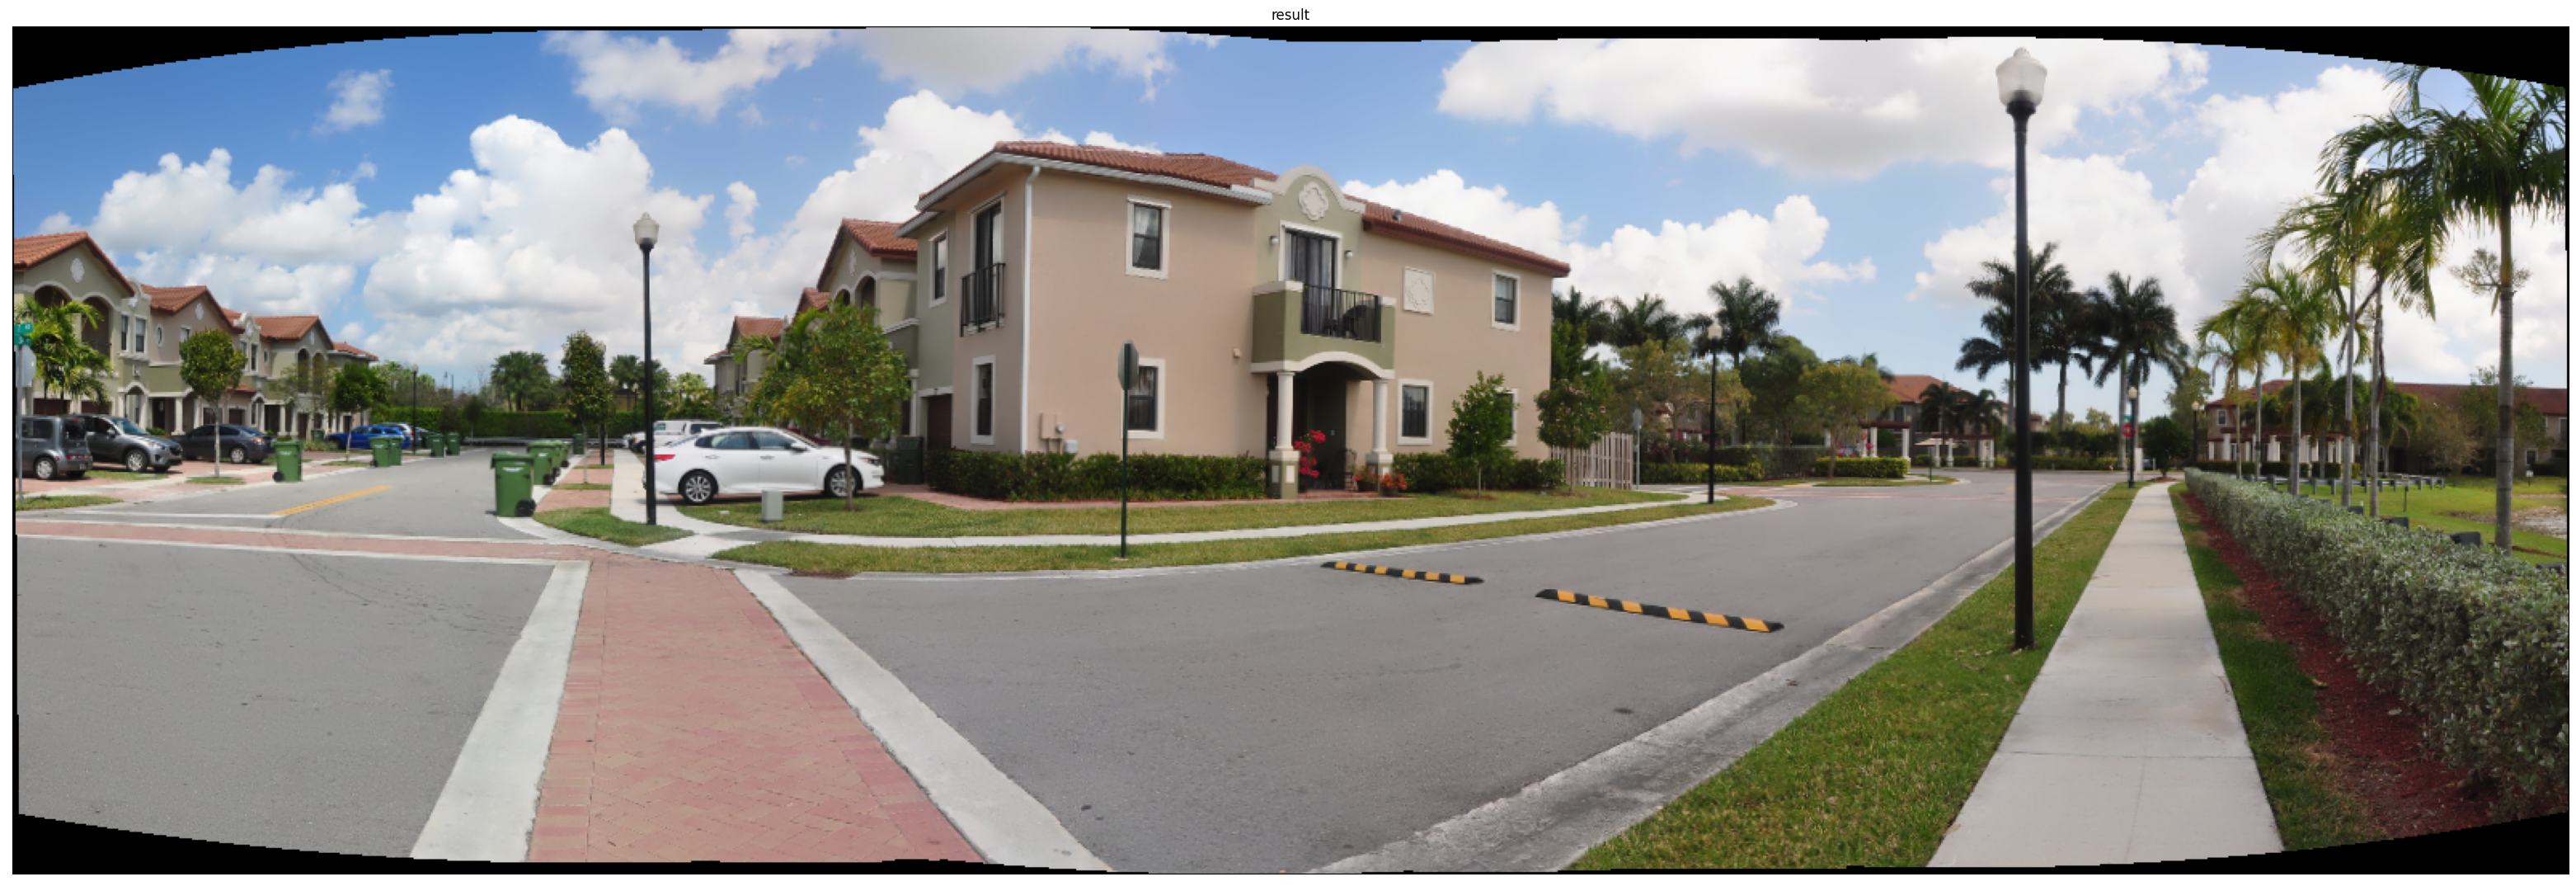

In [21]:
if success_flag != cv2.STITCHER_OK:
    #success_flag shows whether the stitch operation succeeded or not
    print("stitching wasn't successful")
else:
    output_images = []
    output_images.append([result,'result','img'])
    plotter(output_images,1,1,False,40,20,'Q2_2') 